In [8]:
#Assignment No. 01 - Machine Learning - I
#Instructor: Mr. Tariq Mahmood
#Student: Hafiz Muhammad Owais Raza (ERP:29637)

In [9]:
#Dataset No. 01
#URL: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
#Domain: Other
#Size: (Features:36, Instances:4424)

           0       1       2       3       4       5       6       7       8   \
count 3609.00 3609.00 3609.00 3609.00 3609.00 3609.00 3609.00 3609.00 3609.00   
mean     1.09   17.96 9335.99  132.12    1.00    6.96    0.00    0.10    0.00   
std      0.28   17.24  412.47   12.70    0.00   10.23    0.00    0.30    0.00   
min      1.00    1.00 8014.00   95.00    1.00    0.00    0.00    0.00    0.00   
25%      1.00    1.00 9119.00  124.00    1.00    4.00    0.00    0.00    0.00   
50%      1.00   17.00 9254.00  133.00    1.00    5.00    0.00    0.00    0.00   
75%      1.00   39.00 9670.00  140.00    1.00    9.00    0.00    0.00    0.00   
max      2.00   53.00 9991.00  172.00    1.00   90.00    0.00    1.00    0.00   

           9       10      11      12      13      14  
count 3609.00 3609.00 3609.00 3609.00 3609.00 3609.00  
mean     6.24    8.18    0.07    8.04    0.05    1.23  
std      1.33    3.13    0.31    3.18    0.26    1.39  
min      1.00    0.00    0.00    0.00    0.00 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00,  9.93it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 2526, number of used features: 12
[LightGBM] [Info] Start training from score -1.186704
[LightGBM] [Info] Start training from score -1.729599
[LightGBM] [Info] Start training from score -0.658903
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.69               0.59    None      0.68   
RandomForestClassifier             0.68               0.57    None      0.66   
KNeighborsClassifier               0.64               0.55    None      0.63   
AdaBoostClassifier                 0.66               0.55    None      0.64   
ExtraTr

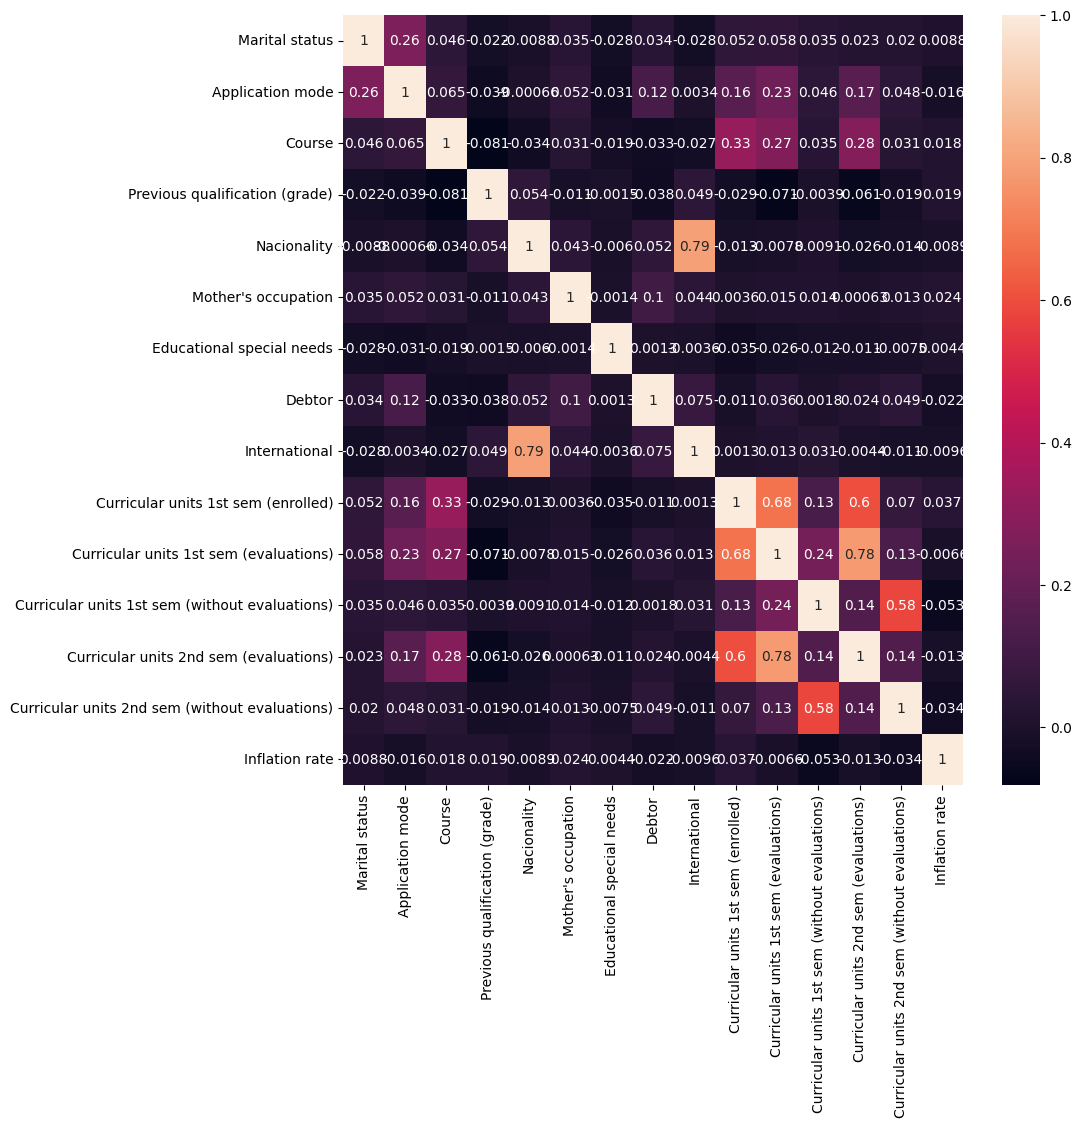

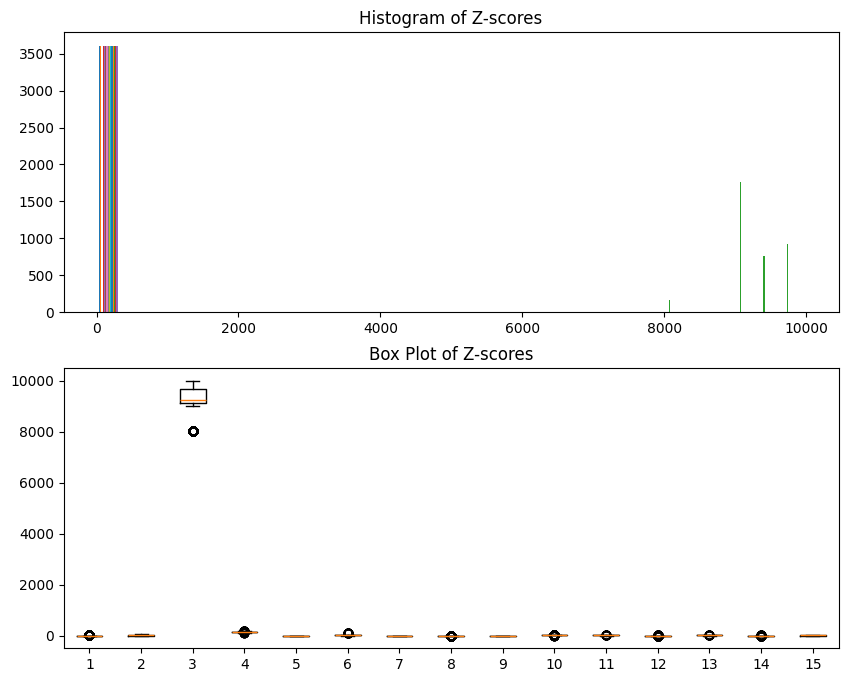

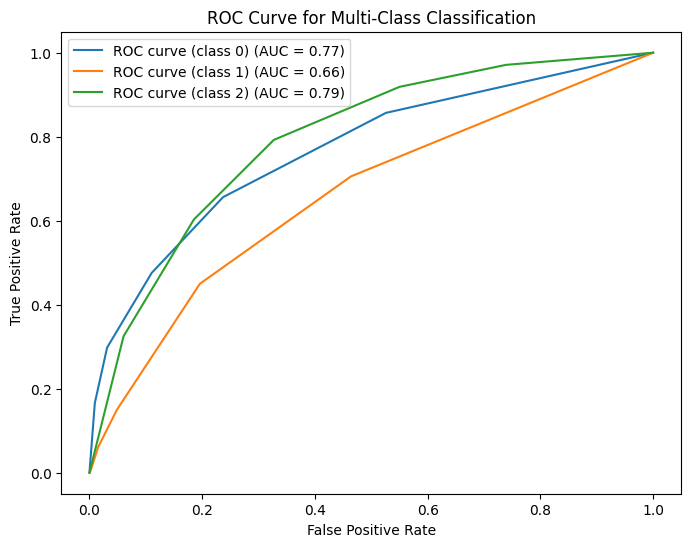

RMSE: 0.9070362073481099
MSE: 0.8227146814404432
MAE: 0.5143120960295475
R2: -0.031016407315124006
Adjusted R2: -0.045510546124615026


In [210]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, mean_squared_error, mean_absolute_error, r2_score
from lazypredict.Supervised import LazyClassifier


#Data Connectivity

def connect_to_data(data_url):
    """
    Connect to the data source and store it in a Pandas DataFrame.
    
    Argument:
    data_url (string): Input path of dataset
    
    Returns:
    DataFrame: DataFrame containing the dataset
    """
    df = pd.read_csv(data_url,sep=';')
    return df


def drawHeatMap(df):
    plt.figure(figsize = (10, 10))
    sns.heatmap(df.corr(), annot = True)
    return

def drawBoxPlotAndHistogram(zscores):
    fig, axs = plt.subplots(2, figsize=(10, 8))
    axs[0].hist(zscores, bins=30)
    axs[0].set_title('Histogram of Z-scores')
    axs[1].boxplot(zscores)
    axs[1].set_title('Box Plot of Z-scores')
    return

def removeOutliers(df, zscores):
    threshold = 3
    # Remove outliers based on z-scores
    df_no_outliers = df[(np.abs(zscores) < threshold).all(axis=1)]
    numeric_df_no_outliers = df_no_outliers.select_dtypes(include=['number'])
    drawBoxPlotAndHistogram(numeric_df_no_outliers)
    return df_no_outliers

def calculateZScore(df):
    numeric_df_filtered = df.select_dtypes(include=['number'])
    zscores = stats.zscore(numeric_df_filtered)
    # print(zscores)
    filtered_df = removeOutliers(df, zscores)
    return filtered_df

def statisticalfunctioning(df):
    print(df.describe())
    return

#Data Cleaning
def data_clean(df):
    """
    Clean the dataset by removing missing values, data entry errors,
    unnecessary columns, and rows, etc.
    
    Argument:
    df (DataFrame): Input DataFrame
    
    Returns:
    DataFrame: Cleaned DataFrame
    """
    # Drop rows with NULL values
    df= df.dropna()
    #Drop columns with NULL Values
    df= df.dropna(axis=1)
    # df= df[df.iloc[:, -1] != "Enrolled"]
    #Separate numerical columns
    numeric_df = df.select_dtypes(include=['number'])
    #Find Correlation
    corr_matrix = numeric_df.corr()
    # Find columns with high correlation
    high_corr_cols = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > 0.9 or corr_matrix.iloc[i, j] < -0.1:
                high_corr_cols.add(corr_matrix.columns[i])
    
    # Remove columns with high correlation
    df_filtered_corr_based = df.drop(columns=high_corr_cols)
    numeric_df_after_corr = df_filtered_corr_based.select_dtypes(include=['number'])
    drawHeatMap(numeric_df_after_corr)
    
    outliers_filtered_df = calculateZScore(df_filtered_corr_based)
    # Drop unnecessary columns
    #df.drop(['unnecessary_column1', 'unnecessary_column2'], axis=1, inplace=True)
    # Replace incorrect values
    #df.replace({'incorrect_value': correct_value}, inplace=True)
    return outliers_filtered_df

def evaluateModel(knn, X_test, y_test):
    # Predict the classes
    y_pred = knn.predict(X_test)
    
    # Precision, Recall, F1, and Accuracy
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Overall Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)
    
    # Convert string labels to numerical labels
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_pred_encoded = label_encoder.fit_transform(y_pred)
    
    # AUC and ROC Curve
    y_pred_proba = knn.predict_proba(X_test)
    y_pred_proba = y_pred_proba / y_pred_proba.sum(axis=1, keepdims=True)
    y_pred_proba = np.nan_to_num(y_pred_proba)

    num_classes = y_pred_proba.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        y_true_binary = (y_test_encoded == i)  # Convert the true labels to binary (0 or 1)
        if np.sum(y_true_binary) > 0:
            fpr[i], tpr[i], _ = roc_curve(y_true_binary, y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        if np.sum(y_true_binary) > 0:
            plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-Class Classification')
    plt.legend()
    plt.show()

    # RMSE, MSE, MAE, R2, Adjusted R2
    rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded))
    mse = mean_squared_error(y_test_encoded, y_pred_encoded)
    mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
    r2 = r2_score(y_test_encoded, y_pred_encoded)
    adjusted_r2 = 1 - (1 - r2) * (len(y_test_encoded) - 1) / (len(y_test_encoded) - X_test.shape[1] - 1)
    
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print("Adjusted R2:", adjusted_r2)
    return


def lazyPredict(X_train,X_test,y_train,y_test):

    # Create a LazyClassifier
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

    # Fit the classifier to the training data and get the predictions
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    
    # Print the summary of the results
    print(models)
    return

def applyClassifierAndCV(features, target):
    #splot
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=22)
    
    print("The dimension of X_train is {}".format(X_train.shape))
    print("The dimension of X_test is {}".format(X_test.shape))
    #Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    #Call LazyPredict
    lazyPredict(X_train,X_test,y_train,y_test)

    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # Perform cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    
    # Print the mean cross-validation score
    print("Mean cross-validation score:", scores.mean())

    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    test_score = knn.score(X_test, y_test)
    print("Test score:", test_score)

    evaluateModel(knn, X_test, y_test)

    return


#Master Func
def master_func():
    dataFrame = connect_to_data("./student-dropout-academic-success-dataset.csv")
    #string columns
    # string_columns = dataFrame.select_dtypes(include='object')
    
    #Count total columns before cleaning
    total_columns_before_clean = dataFrame.shape[1]
    #Cleaning of DataFrame
    cleaned_df = data_clean(dataFrame)
    #Count total columns after cleaning
    total_columns_after_clean = cleaned_df.shape[1]
    #Extract predictors
    features = cleaned_df.columns[0:total_columns_after_clean-1]
    #Extract Target variable
    target = cleaned_df.columns[-1]

    X= pd.DataFrame(cleaned_df[features].values)
    Y= pd.DataFrame(cleaned_df[target].values)
    statisticalfunctioning(X)
    applyClassifierAndCV(X, Y)
    # return cleaned_df.head(100)

master_func()

In [ ]:
#Precision: This measures the ratio of correctly predicted positive observations to the total predicted positives. For Dropout, the precision is 0.62, for Enrolled it's 0.35, and for Graduate it's 0.72. This means that the model is better at predicting the Dropout and Graduate classes compared to the Enrolled class.

#Recall: This measures the ratio of correctly predicted positive observations to the all observations in actual class. For Dropout, the recall is 0.59, for Enrolled it's 0.27, and for Graduate it's 0.79. This means that the model is better at identifying the Graduate class compared to the Dropout and Enrolled classes.

#F1-score: This is the weighted average of Precision and Recall. For Dropout, the F1-score is 0.60, for Enrolled it's 0.30, and for Graduate it's 0.75. This means that the model is best at predicting the Graduate class, followed by Dropout, and then Enrolled.

#Support: This is the number of actual occurrences of the class in the specified dataset. For Dropout, the support is 349, for Enrolled it's 180, and for Graduate it's 554. This means that the model has the most data points for the Graduate class, followed by Dropout, and then Enrolled.

#Accuracy: This is the ratio of correctly predicted observations to the total observations. The overall accuracy of the model is 0.64, which means that the model is correct about 64% of the time.

#Macro Avg: This is the average of the metrics for each class, without considering class imbalance. The macro average precision, recall, and F1-score are 0.56, 0.55, and 0.55, respectively.

#Weighted Avg: This is the weighted average of the metrics for each class, considering class imbalance. The weighted average precision, recall, and F1-score are 0.62, 0.64, and 0.63, respectively.